# Plot Graph

## Imports

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random 

## Class def

In [10]:
class GraphColoringProblem:
    def __init__(self, graph):
        self.graph = graph
        self.adjacency_matrix = nx.adjacency_matrix(graph).todense()

    def __len__(self):
        return nx.number_of_nodes(self.graph)

    def number_of_colors(self, genetic_colors_individual: list):
        '''
        genetic_colors_individual representa o individuo do algoritmo genético
        é uma lista de inteiros, de tamanho igual ao número de vertices do grafo
        e os valores nele contidos representam as cores
        '''
        return len(set(genetic_colors_individual))
    
    def get_cost(self, genetic_colors_individual):
        '''
        Calcula o custo do grafo
        se não houverem restrições, o custo será o número de cores (número cromático)
        '''
        return self.count_adjacencies_violations(genetic_colors_individual) + \
            self.number_of_colors(genetic_colors_individual)

    def count_adjacencies_violations(self, genetic_colors_individual):
        num_violations = 0
        for i in range(len(genetic_colors_individual)):
            # iterando acima da diagonal principal da matriz de adjacencia
            for j in range(i+1, len(genetic_colors_individual)):
                # se vertice i e j forem conexos, faça: 
                if self.adjacency_matrix[i, j]:
                    # se cores destes 2 vertices forem iguais, faça:
                    if genetic_colors_individual[i] == genetic_colors_individual[j]: 
                        num_violations += 1
        return num_violations

    '''
    Operador de reparação: sorteamos se o individuo passará pelo processo de
    reparação, com base na variável (repair_individual_pb). o processo de reparação
    ocorre por meio da adição de novas cores ao grafo, com o intuito de reduzir o
    número de conflitos. Caso dois vértices adjacentes possuam a mesma cor, então
    pode ser atribuído a um deles uma nova cor, dado um segundo sorteio, baseado
    na variável (repair_gene_pb). O processo se encerra quando a quantidade de cores
    do grafo é igual ao número de vértices ou quando toda a matriz de adjacencia é
    verificada
    '''
    def repairing_mechanism(self, genetic_colors_individual, 
                            repair_individual_pb = 0.1, 
                            repair_gene_pb = 0.5):
        # sorteio da execução da reparação no individuo
        if random.random() > repair_individual_pb:
            return genetic_colors_individual
        
        num_colors = self.number_of_colors(genetic_colors_individual)
        max_colors = len(genetic_colors_individual)
        
        for i in range(max_colors):
            for j in range(i+1, max_colors):
                # se cada vértice tiver uma cor distina, faça:
                if num_colors == max_colors:
                    # individuo reparado, retorne-o
                    return genetic_colors_individual 
                if self.adjacency_matrix[i, j]:
                    if genetic_colors_individual[i] == genetic_colors_individual[j]:
                        # sorteio de reparação do gene, se passar, realize reparação
                        if random.random() < repair_gene_pb:
                            # número de cores já representa o índice da próxima cor
                            new_color =  num_colors
                            # muda a cor do vertice de indice i
                            genetic_colors_individual[i] = new_color
                            # incrementa número de cores
                            num_colors += 1           
        return genetic_colors_individual
        
    
    def plot_graph(self, genetic_colors_individual):
        list_colors = list(set(genetic_colors_individual))
        colors = plt.cm.rainbow(np.linspace(0, 1, len(list_colors)))
        mapping_of_colors = []
        for i in range (self.__len__()):
            color = colors[list_colors.index(genetic_colors_individual[i])]
            mapping_of_colors.append(color)

        pos = nx.shell_layout(self.graph, rotate=0)
        nx.draw(self.graph, 
                font_weight='bold',
                node_color= mapping_of_colors)
        return plt

## Auxiliary functions

In [3]:
def aux_plot_graph(graph):
    gcp = GraphColoringProblem(graph)
    solution = np.random.randint(5, size=len(gcp))
    print("Cores aleatórias = ", solution)
    print("Número de cores =", gcp.number_of_colors (solution))
    print("Número de violações =", gcp.count_adjacencies_violations (solution))
    print("Custo (função objetivo) = ", gcp.get_cost(solution))
    plot = gcp.plot_graph(solution)
    plot.show()

## Examples plots

Cores aleatórias =  [3 3 4 3 2 0 3 4 2 4]
Número de cores = 4
Número de violações = 4
Custo (função objetivo) =  8


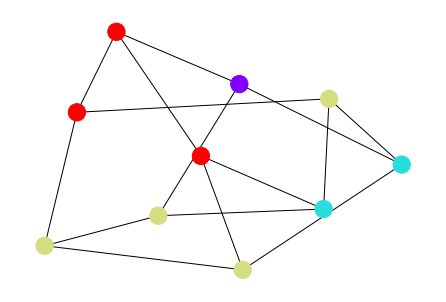

Cores aleatórias =  [1 0 0 3 2 1 4 1 3 1]
Número de cores = 5
Número de violações = 2
Custo (função objetivo) =  7


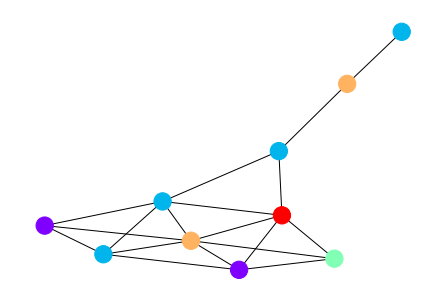

Cores aleatórias =  [2 4 2 0 1 1 3 0 0 4 1 4 3 2 1 4 0 3 4 3 1 0 3 4]
Número de cores = 5
Número de violações = 5
Custo (função objetivo) =  10


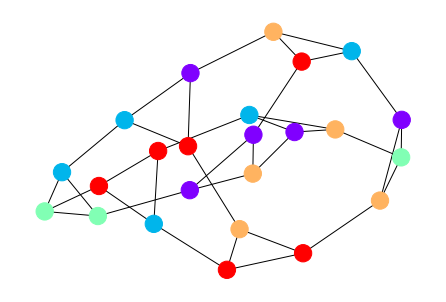

Cores aleatórias =  [1 0 3 2 1 3 3 3 2 2 1 0 3 1 0 4 3 1 2 4 1 2 3 4 1 3 2 2 3 2 4 1 0 2 1 2 2
 0 3 4 0 1 4 4 4 0]
Número de cores = 5
Número de violações = 9
Custo (função objetivo) =  14


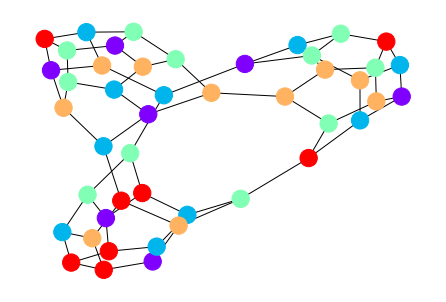

Cores aleatórias =  [0 0 1 0 3 0 4 4 1 2 0 0 2 1 2 4 1 1 4 4 4 0 0 1 3 2 2 2 1 4 1 2 4 4 0 3 0
 2 0 2 1 3 2 1 2 4 4 4 1 2 2 2 4 3 2 0 2 0 3 1 1 2 3 1 2 1 2 0 1 2 0 3 3 2
 3 4 0 2 3 2 0]
Número de cores = 5
Número de violações = 151
Custo (função objetivo) =  156


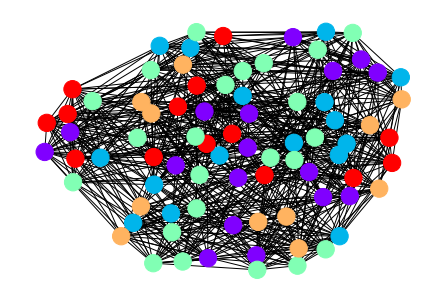

In [4]:
if __name__ == '__main__':
    aux_plot_graph(nx.petersen_graph())
    aux_plot_graph(nx.krackhardt_kite_graph())
    aux_plot_graph(nx.truncated_cube_graph())
    aux_plot_graph(nx.tutte_graph())
    

# Graph Coloring Problem

[post explaining how to do it](https://www.geeksforgeeks.org/project-idea-genetic-algorithms-for-graph-colouring/)

## Imports

In [11]:
from deap.algorithms import varAnd
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt

## Modeling Genetic Algrithm

In [21]:
def graph_coloring_problem(
        graph=nx.petersen_graph(),
        population_size=100, 
        cxpb=0.5, 
        mutpb=0.2,
        repair_individual_pb=0.1,
        repair_gene_pb=0.5,
        ngen=100, 
        hall_of_fame_size=1,
        repairing_enabled=True,
        verbose=True):
    
    #########################################################################
    #                     modelando problema no DEAP                        #
    #########################################################################
    
    number_of_vertices = len(graph)
    gcp = GraphColoringProblem(graph=graph)

    def get_cost(individual):
        return gcp.get_cost(individual),
        
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("integers", random.randint, 0, number_of_vertices-1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.integers, number_of_vertices)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", get_cost)

    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutUniformInt, low=0, up=number_of_vertices, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=2)
    
    population = toolbox.population(n=population_size)
    halloffame = tools.HallOfFame(hall_of_fame_size)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    #########################################################################
    #    Customização do eaSimple, para incorporar mecanismo de reparação   #
    #########################################################################

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Vary the pool of individuals
        offspring = varAnd(offspring, toolbox, cxpb, mutpb)

        #############################################################
        # Porção de código seguinte a execução dos operadores de GA #
        #############################################################
        
        # running repairing mechanism
        if repairing_enabled:
            for index in range(len(offspring)):
                offspring[index] = gcp.repairing_mechanism(
                    offspring[index],
                    repair_individual_pb=repair_individual_pb,
                    repair_gene_pb=repair_gene_pb)
        
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    #############################################################
    #                    Plot de resultados                     #
    #############################################################
    
    gen = logbook.select('gen')
    best_per_gen = logbook.select('min')
    fig, ax = plt.subplots()
    ax.plot(gen, best_per_gen)
    ax.grid()
    ax.set(xlabel="Gerações", ylabel="Melhor Fitness")
    plt.show()
    
    # plot melhore individuo
    gcp.plot_graph(halloffame.items[0])
    #return population, logbook, halloffame

# Performance Evaluation

cxpb=0.5
mutpb=0.2,
population_size=100

## Sem mecanismo de reparo

c:\Users\fbioa\Desktop\Comp Evol\env\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\Users\fbioa\Desktop\Comp Evol\env\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


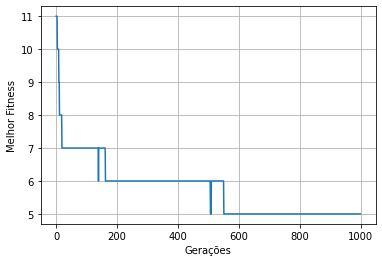

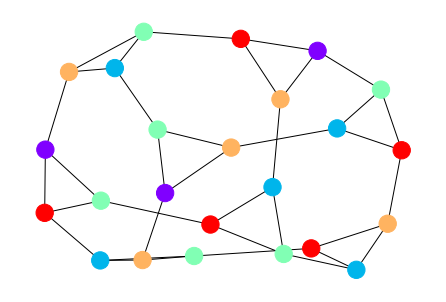

In [24]:
graph_coloring_problem(
    graph=nx.truncated_cube_graph(),
    ngen=1000,
    repairing_enabled=False,
    verbose=False
)

## Com mecanismo de reparo

### Cenário 1

#### Pb reparo indivíduo = 10%
#### Pb reparo gene = 50%

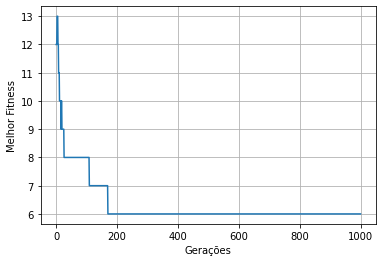

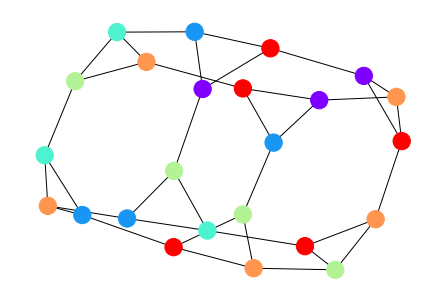

In [25]:
graph_coloring_problem(
    graph=nx.truncated_cube_graph(),
    repair_individual_pb=0.1,
    repair_gene_pb=0.5,
    ngen=1000,
    repairing_enabled=True,
    verbose=False
)

### Cenário 2

#### Pb reparo indivíduo = 50%
#### Pb reparo gene = 70%

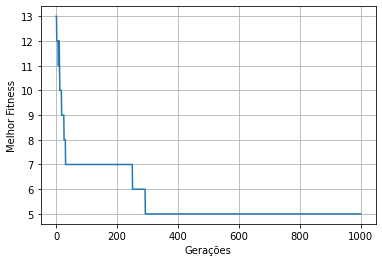

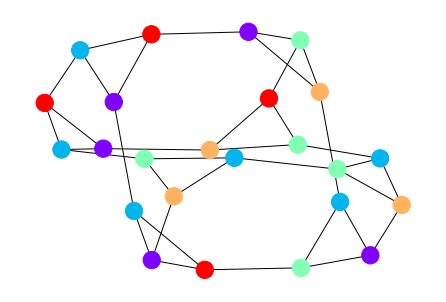

In [26]:
graph_coloring_problem(
    graph=nx.truncated_cube_graph(),
    repair_individual_pb=0.5,
    repair_gene_pb=0.7,
    ngen=1000,
    repairing_enabled=True,
    verbose=False
)

### Cenário 3

#### Pb reparo indivíduo = 100%
#### Pb reparo gene = 100%

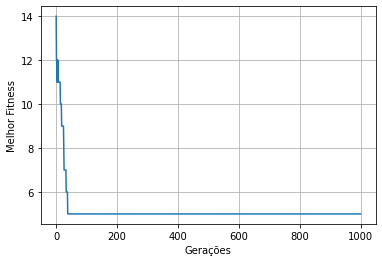

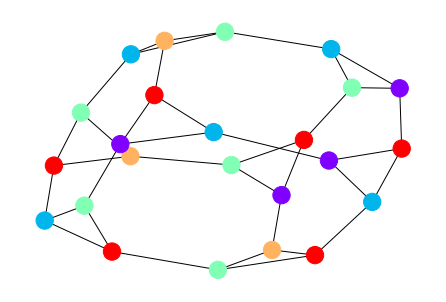

In [27]:
graph_coloring_problem(
    graph=nx.truncated_cube_graph(),
    repair_individual_pb=1.0,
    repair_gene_pb=1.0,
    ngen=1000,
    repairing_enabled=True,
    verbose=False
)